In [84]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from pydantic import BaseModel, Field
from dotenv import load_dotenv
from typing import TypedDict, Literal

load_dotenv()

genmodel = ChatGroq(model="llama-3.3-70b-versatile")
evemodel = ChatGroq(model="llama-3.3-70b-versatile")
optmodel = ChatGroq(model="llama-3.3-70b-versatile")

In [ ]:
class PostState(TypedDict):
    title: str
    content: str
    feedback: Literal["good", "bad"]
    evaluation: str  

    iteration: int
    max_iterations: int

In [ ]:
class EvelSchema(BaseModel):
    feedback: Literal["good", "bad"] = Field(..., description="Feedback on the content")
    explanation: str = Field(..., description="Detailed explanation of the feedback")


strevemodel = evemodel.with_structured_output(EvelSchema)

In [87]:
def gencontent(state: PostState) -> PostState:
    prompt = f"""Generate a blog post with the title: {state['title']}."""
    content = genmodel.invoke(prompt).content
    state['content'] = content
    return state

In [88]:
def evaluatecontent(state: PostState) -> PostState:
    prompt = f"""Evaluate the following blog post content and provide feedback as 'good' or 'bad' along with a short explanation:\n\n{state['content']}"""
    evaeluation = strevemodel.invoke(prompt)
    feedback = evaeluation.feedback
    explanation = evaeluation.explanation
    state['feedback'] = feedback.strip()
    state['evaluation'] = explanation.strip()
    return state

In [89]:
def optimizecontent(state: PostState) -> PostState:
    prompt = f"""Optimize the following blog post content based on the feedback provided:\n\nContent: {state['content']}\nFeedback: {state['evaluation']}"""
    optimized_content = optmodel.invoke(prompt).content
    state['content'] = optimized_content
    state['iteration'] += 1
    return state

In [90]:
graph = StateGraph(PostState)
graph.add_node("generate_content", gencontent)
graph.add_node("evaluate_content", evaluatecontent)
graph.add_node("optimize_content", optimizecontent)


In [91]:
def routes(state: PostState):
    if state['feedback'] == 'good' or state['iteration'] >= state['max_iterations']:
        return "good"
    else:
        return "bad"

In [92]:
graph.add_edge(START, "generate_content")
graph.add_edge("generate_content", "evaluate_content")
graph.add_conditional_edges("evaluate_content",routes,{"good": END, "bad": "optimize_content"})
graph.add_edge("optimize_content", "evaluate_content")

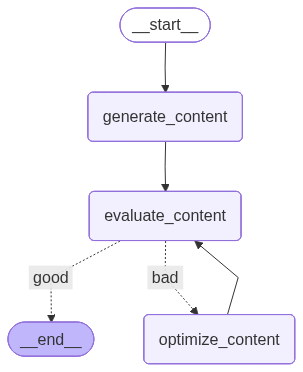

In [93]:
graph.compile()

In [ ]:
initala_state = {
    "title": "The Future of AI in Everyday Life",
    "iteration": 1,
    "max_iterations": 5,
}
workflow = graph.compile()

result = workflow.invoke(initala_state)
print("Final Content:")
print(result['content'])
print(f"\nIterations: {result['iteration']}")
print(f"Final Feedback: {result['feedback']}")

Final Content:
**The Future of AI in Everyday Life**

Artificial intelligence (AI) has been a topic of interest for decades, with numerous sci-fi movies and books exploring the potential of machines that can think and act like humans. However, in recent years, AI has become a reality, and its impact is being felt in various aspects of our daily lives. From virtual assistants to self-driving cars, AI is transforming the way we live, work, and interact with each other. In this blog post, we'll explore the future of AI in everyday life and how it's likely to shape our world in the years to come.

**Current State of AI**

Before we dive into the future, let's take a look at the current state of AI. Today, AI is being used in various applications, including:

1. **Virtual Assistants**: Virtual assistants like Siri, Alexa, and Google Assistant are becoming increasingly popular, allowing us to control our smart homes, play music, and get information with just our voice.
2. **Image Recognition